In [1]:
import pandas as pd
import numpy as np
import os
import country_converter as coco
from tqdm import tqdm

# Datasets

## UN General Debate dataset

### Countries 1970 - 2015

In [6]:
# Get UN General debates speech
dr = '../Data3/un-general-debates.csv'
df_old = pd.read_csv(dr)

### Countries 2016-2020

In [124]:
results = {}
for year in tqdm(range(1970,2021)):
    sess_nr = year-1945
    dr = f'../Data2/TXT/Session {sess_nr} - {year}/'
    items_loop = [x for x in os.listdir(dr) if x[0] != '.']
    results[year] = {}
    for item in items_loop:
        
        country = item.split('_')[0]
        
        # Get item
        with open(dr + item, 'r', encoding='utf8') as f:
            txt = f.read()
            
        results[year][country] = txt
        

100%|██████████████████████████████████████████████████████████████████████████████████| 51/51 [00:53<00:00,  1.05s/it]


In [125]:
countries = pd.melt(pd.DataFrame(results).transpose().reset_index(),id_vars='index')

In [126]:
countries = countries.dropna().copy()
countries['variable'] = countries.variable.replace('POR', 'PRT')
countries.columns = ['year', 'country', 'text']

In [128]:
def year_to_session(year):
    
    return year-1945

In [129]:
countries['session'] = countries.year.map(year_to_session)

In [667]:
vars2016 = countries.country.values.tolist()
vars1970 = df_old.country.values.tolist()
print(np.unique(np.array([x for x in vars1970 if x not in vars2016])))
print(np.unique(np.array([x for x in vars2016 if x not in vars1970])))

NameError: name 'countries' is not defined

### Importing the data

In [36]:
df = pd.read_csv('2021-05-31 data UN.csv')

### Getting other metrics

In [37]:
df.head()

,year,country,text,session
0,1970,ALB,33: May I first convey to our President the co...,25
1,1971,ALB,110.\t This session of the General Assembly i...,26
2,1972,ALB,"First, may I, Mr. President, express to you th...",27
3,1973,ALB,"﻿86.\tMr. President, on behalf of the People's...",28
4,1974,ALB,"Mr. President, I wish first of all, on behalf ...",29


### Getting full name

In [38]:
UN = pd.DataFrame(pd.Series(df.country.unique()).sort_values().reset_index(drop=True))

# Change the column name
UN.columns = ['abbr']

# Get country converter
cc = coco.CountryConverter()

# Get the abbreviations
UN['full_name'] = UN.abbr.map(lambda x: cc.convert(names=x, to='name_short'))

# Export the names 
#UN.to_excel("UN_dataset.xlsx")

CSK not found in ISO3
DDR not found in ISO3
EU not found in ISO2
YDYE not found in regex
YUG not found in ISO3


### Getting time

In [39]:
timeline = pd.read_excel('../Data3/UN_timeline.xlsx')

In [40]:
timeline['day'] = timeline.Date.map(lambda x: int(x[:2].strip().replace('-','')))

In [41]:
dates = ['Oct.', 'Sept.', 'Nov.', 'Dec.', 'Jan.']

In [42]:
s = timeline['Date'].iloc[0]

In [43]:
x = 'Oct.2020'

In [44]:
from itertools import compress

In [47]:
def get_month(s, dates=dates):
    
    for date in dates:
        ls = [x for x in s.split() if not x.find(date)]
        if len(ls) != 0:
            return date
    else:
        return np.nan

In [48]:
timeline.head()

,Session,Date,Meeting Record,Index to Speeches search,day
0,1.0,24-31 Oct. 1946,A/PV.35-45,1946 General Debate,24
1,2.0,17-23 Sept. 1947,A/PV.82-90,1947 General Debate,17
2,3.0,23-29 Sept. 1948,A/PV.139-148,1948 General Debate,23
3,4.0,21-26 Sept. 1949,A/PV.222-229,1949 General Debate,21
4,5.0,20-28 Sept. 1950,A/PV.279-289,1950 General Debate,20


In [49]:
timeline['month'] = timeline.Date.map(get_month)

In [50]:
timeline['year'] = timeline['Index to Speeches search'].map(lambda x: str(x).split()[0])

In [51]:
timeline

,Session,Date,Meeting Record,Index to Speeches search,day,month,year
0,1.0,24-31 Oct. 1946,A/PV.35-45,1946 General Debate,24,Oct.,1946
1,2.0,17-23 Sept. 1947,A/PV.82-90,1947 General Debate,17,Sept.,1947
2,3.0,23-29 Sept. 1948,A/PV.139-148,1948 General Debate,23,Sept.,1948
3,4.0,21-26 Sept. 1949,A/PV.222-229,1949 General Debate,21,Sept.,1949
4,5.0,20-28 Sept. 1950,A/PV.279-289,1950 General Debate,20,Sept.,1950
...,...,...,...,...,...,...,...
71,71.0,20-26 Sept. 2016,A/71/PV.8-22,2016 General Debate,20,Sept.,2016
72,72.0,19-25 Sept. 2017,A/72/PV.3-23,2017 General Debate,19,Sept.,2017
73,73.0,25 Sept.-1 Oct. 2018,A/73/PV.6-16,2018 General Debate,25,Oct.,2018
74,74.0,24-30 Sept. 2019,A/74/PV.3-13,2019 General Debate,24,Sept.,2019


In [52]:
timeline = timeline.drop(19) # Dropping inaccurate time

In [53]:
timeline['year'] = range(1946,2021)

In [54]:
def get_time(row):
    return pd.to_datetime(f"{row['year']}-{row['month'][:-1]}-{row['day']}")

In [55]:
timeline['dt'] = timeline.apply(lambda x: get_time(x), axis=1)

## Uppsala conflict dataset

### Main Dataset

In [2]:
dr2 = '../Data3/ucdp-prio-acd-201.csv'

In [3]:
def get_upps_mapping(df2):
    
    # Get cbook
    cbook = pd.read_excel('../Data3/map2.xlsx')
    
    # Get mapping
    mapping = {i[1][0]:i[1][1] for i in cbook.iterrows()}
    
    # create column with countrycodes
    df2['countrycode'] = df2.gwno_loc.map(lambda ls: [mapping.get(int(x), 'NA') for x in ls.replace(',','').split()])
    
    # Change columns
    df2.columns = [{'countrycode': 'country'}.get(x, x) for x in df2.columns]
    
    return df2

In [4]:
# Read Uppsala conflict
df2 = pd.read_csv(dr2)

# Get mapping between countrycode and country
df2 = get_upps_mapping(df2)

In [14]:
df2[df2.year == 1970].country.explode().unique()

array(['EGY', 'ISR', 'PHI', 'MYA', 'IND', 'YEM', 'GUA', 'LAO', 'ANG',
       'IRQ', 'ETH', 'GNB', 'SUD', 'MZM', 'CHA', 'COL', 'DRV', 'RVN',
       'SAF', 'CAM', 'NIG', 'OMA'], dtype=object)

In [17]:
df2[df2.year == 1970].country.explode().unique()

array(['EGY', 'ISR', 'PHI', 'MYA', 'IND', 'YEM', 'GUA', 'LAO', 'ANG',
       'IRQ', 'ETH', 'GNB', 'SUD', 'MZM', 'CHA', 'COL', 'DRV', 'RVN',
       'SAF', 'CAM', 'NIG', 'OMA'], dtype=object)

In [111]:
df2[df2.year == 2010].country.explode().nunique()

25

In [114]:
country_conflicts = {}
for year in range(1970,2020):
    cs = df2[df2.year == year].country.explode().nunique()
    country_conflicts[year] = cs

In [120]:
pd.Series(country_conflicts).to_csv("2021-06-02 country_n_conflicts.csv")

In [96]:
c1971 = df2[df2.year==1971].country.explode().unique()

In [101]:
UN_codes = ['COL', 'GBR', 'GTM', 'IND', 'ISR', 'KHM', 'LKA', 'MAR', 'MDG',
       'MMR', 'PAK', 'PHL', 'SDN', 'ZAF', 'ETH', 'LAO', 'TCD', 'UGA']

In [102]:
c1971_UN_transf = [Upps2UN.get(x, 'NA') for x in c1971]

In [103]:
[x for x in c1971_UN_transf if x not in UN_codes]

['AGO', 'GNB', 'MOZ', 'VNM', 'NA', 'OMN']

In [886]:
df2.columns

Index(['conflict_id', 'location', 'side_a', 'side_a_id', 'side_a_2nd',
       'side_b', 'side_b_id', 'side_b_2nd', 'incompatibility',
       'territory_name', 'year', 'intensity_level', 'cumulative_intensity',
       'type_of_conflict', 'start_date', 'start_prec', 'start_date2',
       'start_prec2', 'ep_end', 'ep_end_date', 'ep_end_prec', 'gwno_a',
       'gwno_a_2nd', 'gwno_b', 'gwno_b_2nd', 'gwno_loc', 'region', 'version',
       'country'],
      dtype='object')

### Conflict Deaths

In [ ]:
deaths = pd.read_excel('../Data3/ucdp-brd-conf-201.xlsx')

In [5]:
deaths = pd.read_excel(r'C:\Users\Paulius\OneDrive\Oxford University\Courses\Trinity\Thesis\Raw Data UN\Conflict and UN Data\ucdp-brd-conf-201.xlsx')

In [6]:
deaths.columns

Index(['conflict_id', 'dyad_id', 'location_inc', 'side_a', 'side_a_id',
       'side_a_2nd', 'side_b', 'side_b_id', 'side_b_2nd', 'incompatibility',
       'territory_name', 'year', 'bd_best', 'bd_low', 'bd_high',
       'type_of_conflict', 'battle_location', 'gwno_a', 'gwno_a_2nd', 'gwno_b',
       'gwno_b_2nd', 'gwno_loc', 'gwno_battle', 'region', 'version',
       'Unnamed: 25'],
      dtype='object')

In [29]:
usecols = ['conflict_id', 'year', 'bd_best']
deaths_filt = deaths[usecols]

In [30]:
assert deaths_filt.groupby(['conflict_id', 'year']).bd_best.count().max() == 1, 'not unique to conflict year'

### Merging deaths and conflict data

In [31]:
df3 = pd.merge(df2, deaths_filt, on=['conflict_id', 'year'], how='left')

<AxesSubplot:xlabel='year'>

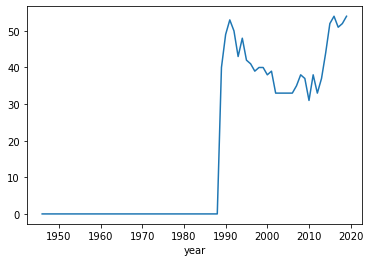

In [32]:
df3.groupby(['conflict_id', 'year']).bd_best.count().reset_index().groupby('year').bd_best.sum().plot()

In [33]:
df3.columns

Index(['conflict_id', 'location', 'side_a', 'side_a_id', 'side_a_2nd',
       'side_b', 'side_b_id', 'side_b_2nd', 'incompatibility',
       'territory_name', 'year', 'intensity_level', 'cumulative_intensity',
       'type_of_conflict', 'start_date', 'start_prec', 'start_date2',
       'start_prec2', 'ep_end', 'ep_end_date', 'ep_end_prec', 'gwno_a',
       'gwno_a_2nd', 'gwno_b', 'gwno_b_2nd', 'gwno_loc', 'region', 'version',
       'country', 'bd_best'],
      dtype='object')

### Merging timeline

In [34]:
df3['start_date_dt'] = pd.to_datetime(df3['start_date'])

In [56]:
df4 = pd.merge(df3, timeline, on='year', how='left')

In [57]:
df4.day.isnull().mean()

0.0

In [58]:
df4['conflict_before'] = df4['start_date_dt'] <= df4['dt']
df4['conflict_days_before'] = (df4['dt'] - df4['start_date_dt']).dt.days

<AxesSubplot:>

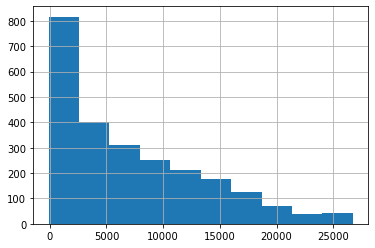

In [59]:
df4['conflict_days_before'].hist()

## Get merged dataframe

### Get mapping for Uppsala

In [60]:
df4 = df4[df4.year >= 1970].copy()

In [61]:
# Get COW mappings
COW = pd.read_csv('../Data3/COW country codes.csv')


In [62]:
# Change to Grenada
df4.loc[1902, 'country'][1] = 'GRD'

# Changing entry from ROW to RUM
COW.loc[100, 'StateAbb'] = 'RUM'

In [63]:
COW = COW.append({'CCode': np.nan, 'StateAbb': 'GRD', 'StateNme': 'Grenada'}, ignore_index=True)
COW = COW.append({'CCode': np.nan, 'StateAbb': 'SRB', 'StateNme': 'Serbia'}, ignore_index=True) # Append to pandas dataframe GRENADA

In [64]:
# Change some country names
COW.loc[0, 'StateNme'] = 'United States'
COW.loc[228, 'StateNme'] = 'Timor-Leste'
COW.loc[149, 'StateNme'] = 'Rwanda'
COW.loc[143, 'StateNme'] = 'DR Congo'
COW.loc[16, 'StateNme'] = 'Antigua and Barbuda'
COW.loc[130, 'StateNme'] = "Cote d'Ivoire"
COW.loc[241, 'StateNme'] = 'Micronesia, Fed. Sts.'
COW.loc[199, 'StateNme'] = 'Kyrgyz Republic'
COW.loc[142, 'StateNme'] = 'Congo Republic'
COW.loc[225, 'StateNme'] = 'Brunei Darussalam'
COW.loc[120, 'StateNme'] = 'Cabo Verde'

In [68]:
COW.loc[199]

StateAbb                KYR
CCode                 703.0
StateNme    Kyrgyz Republic
Name: 199, dtype: object

In [65]:
COW = COW.drop_duplicates()

Democratic Republic of Congo is missing (DRC)

### Testing the data

In [69]:
([x for x in UN['full_name'] if x not in COW['StateNme'].tolist()])

['not found',
 'not found',
 'not found',
 'Palestine',
 'Eswatini',
 'Vatican',
 'not found',
 'not found']

In [70]:
df4[df4.location == 'Vietnam (North Vietnam)'].country

Series([], Name: country, dtype: object)

In [71]:
COW[COW['StateAbb'] == 'DRV']

,StateAbb,CCode,StateNme
221,DRV,816.0,Vietnam


### Merging

In [72]:
# Merge
merged_df = pd.merge(UN, COW, left_on='full_name', right_on='StateNme', how='inner')

Remainder of the countries are NAs

- RUM -> Romania (ROM) +
- GRD -> Grenada  +
- Hyderabad -> Excluded (No UN Speeches on their behalf anyway)


Remove (no data on conflicts, although exists in UN speeches):
- 'Palestine',
- 'Eswatini',
- Democratic Republic of Yemen (YDYE, YPR) <-- included


No speech but conflict exists:
- South Vietnam (excluded, RVN)

In [73]:
UppsCountries = np.unique(df4.country.explode()).tolist()
UppsAbbCOW = COW['StateAbb'].tolist()

In [74]:
np.unique([x for x in UppsAbbCOW if x not in UppsCountries])

array(['AAB', 'ALB', 'AND', 'ARM', 'AUH', 'AUS', 'BAD', 'BAH', 'BAR',
       'BAV', 'BEL', 'BEN', 'BHM', 'BHU', 'BLR', 'BLZ', 'BOL', 'BOT',
       'BRA', 'BRU', 'BUL', 'CAN', 'CAP', 'COS', 'CUB', 'CZE', 'CZR',
       'DEN', 'DMA', 'DOM', 'EQG', 'EST', 'ETM', 'FIJ', 'FIN', 'FRN',
       'FSM', 'GAB', 'GDR', 'GFR', 'GMY', 'GRC', 'GRN', 'GUY', 'HAN',
       'HON', 'HSE', 'HSG', 'HUN', 'ICE', 'IRE', 'ITA', 'JAM', 'JPN',
       'KIR', 'KOR', 'KOS', 'KYR', 'KZK', 'LAT', 'LIE', 'LIT', 'LUX',
       'MAD', 'MAS', 'MAW', 'MEC', 'MLT', 'MNC', 'MNG', 'MOD', 'MON',
       'MSI', 'NAM', 'NAU', 'NEW', 'NOR', 'NTH', 'PAL', 'PAP', 'PMA',
       'POL', 'POR', 'PRK', 'QAT', 'ROK', 'SAX', 'SEY', 'SIC', 'SIN',
       'SKN', 'SLO', 'SLU', 'SLV', 'SNM', 'SOL', 'SRB', 'STP', 'SVG',
       'SWA', 'SWD', 'SWZ', 'TAW', 'TKM', 'TON', 'TUS', 'TUV', 'UAE',
       'VAN', 'WRT', 'WSM', 'YAR', 'ZAM', 'ZAN'], dtype='<U3')

In [75]:
len(UppsAbbCOW)

219

In [76]:
COW[COW['StateAbb'] == 'YEM']

,StateAbb,CCode,StateNme
189,YEM,679.0,Yemen


In [77]:
df4[df4.country.map(lambda ls: 'YPR' in ls)]

,conflict_id,location,side_a,side_a_id,side_a_2nd,side_b,side_b_id,side_b_2nd,incompatibility,territory_name,...,start_date_dt,Session,Date,Meeting Record,Index to Speeches search,day,month,dt,conflict_before,conflict_days_before
1552,320,"South Yemen, Yemen (North Yemen)",Government of South Yemen,124,NaN,Government of Yemen (North Yemen),123,NaN,3,Common border,...,1972-02-21,27.0,25 Sept.-11 Oct. 1972,A/PV.2038-2063,1972 General Debate,25,Oct.,1972-10-25,True,247
1553,320,"South Yemen, Yemen (North Yemen)",Government of South Yemen,124,NaN,Government of Yemen (North Yemen),123,NaN,3,Common border,...,1972-02-21,34.0,24 Sept.-12 Oct. 1979,A/34/PV.5-32,1979 General Debate,24,Oct.,1979-10-24,True,2802
1985,359,South Yemen,Government of South Yemen,124,NaN,YSP - AFI,324,NaN,2,NaN,...,1986-01-13,41.0,22 Sept.-10 Oct. 1986,A/41/PV.4-32,1986 General Debate,22,Oct.,1986-10-22,True,282


In [78]:
UN[UN.full_name == 'Yemen']

,abbr,full_name
195,YEM,Yemen


In [79]:
UN[UN.abbr == 'YDYE']

,abbr,full_name
194,YDYE,not found


In [81]:
COW[COW.StateNme == 'Democratic Republic of Yemen']

,StateAbb,CCode,StateNme


In [82]:
df4[df4.country.map(lambda ls: 'RVN' in ls)]

,conflict_id,location,side_a,side_a_id,side_a_2nd,side_b,side_b_id,side_b_2nd,incompatibility,territory_name,...,start_date_dt,Session,Date,Meeting Record,Index to Speeches search,day,month,dt,conflict_before,conflict_days_before
1260,293,"South Vietnam, Vietnam (North Vietnam)",Government of South Vietnam,151,"Government of Australia, Government of New Zea...",Government of Vietnam (North Vietnam),150,Government of North Korea,1,South Vietnam,...,1965-12-31,25.0,17 Sept.-2 Oct. 1970,A/PV.1841-1859,1970 General Debate,17,Oct.,1970-10-17,True,1751
1261,293,"South Vietnam, Vietnam (North Vietnam)",Government of South Vietnam,151,"Government of Australia, Government of New Zea...",Government of Vietnam (North Vietnam),150,Government of North Korea,1,South Vietnam,...,1965-12-31,26.0,27 Sept.-13 Oct. 1971,A/PV.1940-1965,1971 General Debate,27,Oct.,1971-10-27,True,2126
1262,293,"South Vietnam, Vietnam (North Vietnam)",Government of South Vietnam,151,"Government of Australia, Government of New Zea...",Government of Vietnam (North Vietnam),150,Government of North Korea,1,South Vietnam,...,1965-12-31,27.0,25 Sept.-11 Oct. 1972,A/PV.2038-2063,1972 General Debate,25,Oct.,1972-10-25,True,2490
1263,293,"South Vietnam, Vietnam (North Vietnam)",Government of South Vietnam,151,"Government of South Korea, Government of Unite...",Government of Vietnam (North Vietnam),150,Government of North Korea,1,South Vietnam,...,1965-12-31,28.0,24 Sept.-11 Oct. 1973,A/PV.2124-2150,1973 General Debate,24,Oct.,1973-10-24,True,2854
1264,293,"South Vietnam, Vietnam (North Vietnam)",Government of South Vietnam,151,NaN,Government of Vietnam (North Vietnam),150,Government of North Korea,1,South Vietnam,...,1965-12-31,29.0,23 Sept.-10 Oct. 1974,A/PV.2238-2265,1974 General Debate,23,Oct.,1974-10-23,True,3218
1265,293,"South Vietnam, Vietnam (North Vietnam)",Government of South Vietnam,151,NaN,Government of Vietnam (North Vietnam),150,Government of North Korea,1,South Vietnam,...,1965-12-31,30.0,22 Sept.-9 Oct. 1975,A/PV.2355-2382,1975 General Debate,22,Oct.,1975-10-22,True,3582


## Creating Mappings

In [84]:
# Additional country mappings to add
UN2Upps_add = {'CSK':'CZE', # Seems ok. Czech Republic is denoted as CZR
               'DDR': 'GDR', # Seems ok
               'YUG': 'YUG', # Seems ok
              'YDYE': 'YPR', # South Yemen
              'SWZ': 'SWZ'} # Eswatini, no conflict

# Get mapping
UN2Upps = {k[1]['abbr']:k[1]['StateAbb'] for k in merged_df.iterrows()}
UN2Upps = {**UN2Upps, **UN2Upps_add}
Upps2UN = {v:k for k,v in UN2Upps.items()}

In [87]:
Upps2UN['PHI']

'PHL'

In [91]:
len(Upps2UN)

196

In [93]:
import json

In [94]:
with open('mapping_UPS2UN.json', 'w') as outfile:
    json.dump(Upps2UN, outfile)

In [85]:
# Get dataframes for UN and Uppsala
UN_df = df
Upps_df = df4.explode('country')

# Get country mapping
Upps_df['country_map'] = Upps_df.country.map(Upps2UN)

In [1252]:
Upps_df[Upps_df['country_map'].isnull()].country.unique()

array(['RVN'], dtype=object)

In [1253]:
# Get a count of indices that are conflicts
counts_upps = Upps_df.groupby(['country_map', 'year']).conflict_id.count().reset_index()

# Get columns
cols = ['country_map',
 'year',
 'conflict_id',
 'incompatibility',
 'intensity_level',
 'type_of_conflict',
 'cumulative_intensity',
 'bd_best', 
 'conflict_before']

# Get filtered df
Upps_df_filtered = Upps_df[cols]

## Doing transformations

In [1254]:
def get_cols(conf_df_merged):
    """Extracts the column names to be changed from the dataframe"""
    
    # Get first cols
    firstcols = conf_df_merged.columns[0:2].tolist()
    cols = conf_df_merged.columns[2:].tolist()
    
    # Get letters (for labelling columns)
    n_letters = int(len(cols)/4)
    letters = (['x', 'y', 'z', 'q', 'w', 'r', 't'])
    
    # Get letters to use
    l2use = letters[:n_letters]
    
    # Get n of unique items
    
    ls = [[l2use[i]]*7 for i, x in enumerate(l2use)]
    
    # Get flat list
    flat_list = [item for sublist in ls for item in sublist]

    # Get new columns
    # Rationale: If you merge a lot of columns, the last ones do not have _x in it. So, I change just the letter of the suffix if there is already a suffix, but if there is no suffix, I literally add _x, _y, _z
    newcols = [x[:-1] + y if x[-2] == '_' else x + '_' + y for x, y in zip(cols, flat_list)]
    all_cols = firstcols + newcols
    
    return all_cols

In [1255]:
conf_df_merged.columns.tolist().__len__()

16

In [1256]:
len(newcols)

16

In [1257]:
conf_df_merged.columns

Index(['country_map', 'year', 'conflict_id_x', 'incompatibility_x',
       'intensity_level_x', 'type_of_conflict_x', 'cumulative_intensity_x',
       'bd_best_x', 'conflict_before_x', 'conflict_id_y', 'incompatibility_y',
       'intensity_level_y', 'type_of_conflict_y', 'cumulative_intensity_y',
       'bd_best_y', 'conflict_before_y'],
      dtype='object')

In [1258]:
Upps_df_updated = pd.DataFrame()

In [1259]:
for row in counts_upps.iterrows():
    cmap = row[1]['country_map']
    year = row[1]['year']
    
    conf_df = Upps_df_filtered.loc[(Upps_df_filtered.country_map==cmap) & (Upps_df_filtered.year == year)]
    
    # Get number of instances per year
    n_items = row[1]['conflict_id']
    
    # If one row, just append. Otherwise, convert to one row
    if n_items == 1:
        
        # Change the column names (to harmonize)
        cols = conf_df.columns
        conf_df.columns = [x + '_x' if x in cols[2:] else x for x in cols]
        
        #Upps_df_updated.columns = [x + '_x' if x not in Upps_df_updated.columns[:2] else x for x in Upps_df_updated.columns]
        Upps_df_updated = Upps_df_updated.append(conf_df)
        
    else:
        # Get a list that contains all the conflicts
        temp = [conf_df.iloc[[k]] for k in range(n_items)]
        
        assert len(temp) > 1, 'Only one item in temp'
        
        # Merge all of the separate datasets
        
        # Get first item form the list
        conf_df_merged = temp[0]
        
        # Loop over all other items and merge them one by one
        for df_ in temp[1:]:
              conf_df_merged = conf_df_merged.merge(df_, on=['country_map', 'year'], how='inner')
       
        #conf_df_merged = pd.merge(*temp, on=['country_map', 'year'], how='inner')
        
        # Get cols
        newcols = get_cols(conf_df_merged)
        
        conf_df_merged.columns = newcols
        
        # Append
        Upps_df_updated = Upps_df_updated.append(conf_df_merged)

In [1260]:
assert (Upps_df_updated.groupby(['country_map', 'year']).count() > 1).reset_index().iloc[:,2:].sum(axis=1).sum() == 0, 'There are duplicate entries in the dataframe'

In [1261]:
UN_df.head()

,year,country,text,session
0,1970,ALB,33: May I first convey to our President the co...,25
1,1971,ALB,110.\t This session of the General Assembly i...,26
2,1972,ALB,"First, may I, Mr. President, express to you th...",27
3,1973,ALB,"﻿86.\tMr. President, on behalf of the People's...",28
4,1974,ALB,"Mr. President, I wish first of all, on behalf ...",29


In [1262]:
Upps_df_updated.head()

,country_map,year,conflict_id_x,incompatibility_x,intensity_level_x,type_of_conflict_x,cumulative_intensity_x,bd_best_x,conflict_before_x,conflict_id_y,...,cumulative_intensity_r,bd_best_r,conflict_before_r,conflict_id_t,incompatibility_t,intensity_level_t,type_of_conflict_t,cumulative_intensity_t,bd_best_t,conflict_before_t
1716,AFG,1978,333,2,2,3,1,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,AFG,1979,333,2,2,3,1,NaN,True,431.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1718,AFG,1980,333,2,2,4,1,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1719,AFG,1981,333,2,2,4,1,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1720,AFG,1982,333,2,2,4,1,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1292]:
export_df = pd.merge(UN_df, Upps_df_updated, how='left', left_on=['year', 'country'], right_on=['year', 'country_map'])

In [1293]:
export_df['is_war'] = export_df['conflict_id_x'].notnull()

In [1294]:
export_df['is_war'].mean()

0.16318830326612427

In [1295]:
assert export_df.groupby(['year', 'country']).text.count().max() == 1, 'Duplicate entries discovered'

In [1296]:
export_df.columns

Index(['year', 'country', 'text', 'session', 'country_map', 'conflict_id_x',
       'incompatibility_x', 'intensity_level_x', 'type_of_conflict_x',
       'cumulative_intensity_x', 'bd_best_x', 'conflict_before_x',
       'conflict_id_y', 'incompatibility_y', 'intensity_level_y',
       'type_of_conflict_y', 'cumulative_intensity_y', 'bd_best_y',
       'conflict_before_y', 'conflict_id_z', 'incompatibility_z',
       'intensity_level_z', 'type_of_conflict_z', 'cumulative_intensity_z',
       'bd_best_z', 'conflict_before_z', 'conflict_id_q', 'incompatibility_q',
       'intensity_level_q', 'type_of_conflict_q', 'cumulative_intensity_q',
       'bd_best_q', 'conflict_before_q', 'conflict_id_w', 'incompatibility_w',
       'intensity_level_w', 'type_of_conflict_w', 'cumulative_intensity_w',
       'bd_best_w', 'conflict_before_w', 'conflict_id_r', 'incompatibility_r',
       'intensity_level_r', 'type_of_conflict_r', 'cumulative_intensity_r',
       'bd_best_r', 'conflict_before_r', 'co

In [1297]:
for i, letter in enumerate(['a', 'b']):
    print(i)

0
1


In [1298]:
# Get letters
letters = ['x', 'y', 'z', 'q', 'w', 'r', 't']
letters = letters[::-1]


In [1299]:
def number_of_conflicts(row, letters=letters):

    for i, letter in enumerate(letters):
        if not pd.isna(row[f'conflict_id_{letter}']):
            return len(letters) - i
    else:
        return 0

In [1300]:
export_df['n_conflicts'] = export_df.apply(lambda row: number_of_conflicts(row), axis=1)

In [1301]:
def total_best_numbers(row, letters=letters):
    cols = [f'bd_best_{k}' for k in letters]
    return row[cols].sum()

In [1302]:
export_df['total_deaths'] = export_df.apply(lambda row: total_best_numbers(row), axis=1)

In [1303]:
def incompatibility_over(row, letters=letters):
    cols = [f'incompatibility_{k}' for k in letters]
    incs = []
    for col in cols: incs.append(row[col])
       
    incs = pd.Series(incs).value_counts()
    
    if len(incs) == 0:
        return 'No incompatibility'
    elif len(incs) == 1:
            val = incs.keys()
            if val == 1:
                return 'Territory'
            elif val == 2:
                return 'Government'
            elif val == 3:
                return 'G&T (single conflict)'
            else:
                raise ValueError("Incompatibility function not exhaustive")
    else:
        return "G&T (multiple conflicts)"
    

In [1304]:
export_df['incompatibility'] = export_df.apply(lambda row: incompatibility_over(row), axis=1)

In [1305]:
def intensity_level(row):
    cols = [f'intensity_level_{k}' for k in letters]
    incs = []
    for col in cols: incs.append(row[col])
       
    incs = pd.Series(incs).value_counts()
   
    if len(incs) == 0:
        return 'No conflict'
    
    elif len(incs) == 1:
        val = incs.keys()
        
        if val == 1: return 'Conflict'
        elif val == 2: return 'War'
        else: raise ValueError("Function not exhaustive")
    
    else:
        return "Conflict & War (multiple conflicts)"

In [1306]:
export_df['intensity'] = export_df.apply(lambda row: intensity_level(row), axis=1)

In [1307]:
export_df['intensity'].value_counts()

No conflict                            7097
Conflict                                968
War                                     289
Conflict & War (multiple conflicts)     127
Name: intensity, dtype: int64

In [1308]:
export_df.intensity_level_x.value_counts()

1.0    1044
2.0     340
Name: intensity_level_x, dtype: int64

In [1309]:
def type_of_conflict(row):
    
    cols = [f'type_of_conflict_{k}' for k in letters]
    incs = []
    for col in cols: incs.append(row[col])
       
    incs = pd.Series(incs).value_counts()
   
    if len(incs) == 0:
        return 'No conflict'
    
    elif len(incs) == 1:
        val = incs.keys()
        
        if val == 1: return 'Extrasystematic'
        elif val == 2: return 'Interstate'
        elif val == 3: return 'Intrastate'
        elif val == 4: return 'Internationalized intrastate'
        else: raise ValueError("Function not exhaustive")
    
    else:
        return "Multiple conflicts"

In [1310]:
export_df['type_of_conflict'] = export_df.apply(lambda row: type_of_conflict(row), axis=1)

In [1311]:
export_df['type_of_conflict_x'].value_counts()

3.0    1027
4.0     251
2.0     106
Name: type_of_conflict_x, dtype: int64

In [1312]:
export_df.columns

Index(['year', 'country', 'text', 'session', 'country_map', 'conflict_id_x',
       'incompatibility_x', 'intensity_level_x', 'type_of_conflict_x',
       'cumulative_intensity_x', 'bd_best_x', 'conflict_before_x',
       'conflict_id_y', 'incompatibility_y', 'intensity_level_y',
       'type_of_conflict_y', 'cumulative_intensity_y', 'bd_best_y',
       'conflict_before_y', 'conflict_id_z', 'incompatibility_z',
       'intensity_level_z', 'type_of_conflict_z', 'cumulative_intensity_z',
       'bd_best_z', 'conflict_before_z', 'conflict_id_q', 'incompatibility_q',
       'intensity_level_q', 'type_of_conflict_q', 'cumulative_intensity_q',
       'bd_best_q', 'conflict_before_q', 'conflict_id_w', 'incompatibility_w',
       'intensity_level_w', 'type_of_conflict_w', 'cumulative_intensity_w',
       'bd_best_w', 'conflict_before_w', 'conflict_id_r', 'incompatibility_r',
       'intensity_level_r', 'type_of_conflict_r', 'cumulative_intensity_r',
       'bd_best_r', 'conflict_before_r', 'co

In [1313]:
def get_conflict_before(row, letters=letters):
    
    cols = [f'conflict_before_{k}' for k in letters]
    incs = []
    for col in cols: incs.append(row[col])
       
    incs = pd.Series(incs).value_counts()
   
    if len(incs) == 0:
        return 'No conflict'
    
    elif len(incs) == 1:
        val = incs.keys()[0]
        
        if val:
            return 'Conflict before'
        else:
            return 'Conflict after'

    else:
        return "Conflict before and after"

In [1314]:
export_df['conflict_before'] = export_df.apply(lambda row: get_conflict_before(row), axis=1)

In [1315]:
export_df['conflict_before'].value_counts(dropna=False)

No conflict                  7097
Conflict before              1365
Conflict after                 15
Conflict before and after       4
Name: conflict_before, dtype: int64

In [1316]:
cols = ['year', 'country', 'text', 'session', 'country_map', 'is_war', 'n_conflicts', 'total_deaths', 'incompatibility', 'intensity', 'type_of_conflict', 'conflict_before']

- 'Palestine',
- 'Eswatini', <-- included
- 'Vatican' <-- included
- Democratic Republic of Yemen (YDYE, YPR) <-- included, merged
- EU <- removed

In [1317]:
remove_countries = ['PSE', 'EU'] # Remove speeches from Palestine and the EU

In [1318]:
export_df = export_df[~export_df.country.isin(remove_countries)].copy()

In [1319]:
export_df[cols].to_csv("2021-06-01 df_merged.csv", index=False)

In [1323]:
export_df.head()

,year,country,text,session,country_map,conflict_id_x,incompatibility_x,intensity_level_x,type_of_conflict_x,cumulative_intensity_x,...,cumulative_intensity_t,bd_best_t,conflict_before_t,is_war,n_conflicts,total_deaths,incompatibility,intensity,type_of_conflict,conflict_before
0,1970,ALB,33: May I first convey to our President the co...,25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,0,0.0,No incompatibility,No conflict,No conflict,No conflict
1,1971,ALB,110.\t This session of the General Assembly i...,26,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,0,0.0,No incompatibility,No conflict,No conflict,No conflict
2,1972,ALB,"First, may I, Mr. President, express to you th...",27,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,0,0.0,No incompatibility,No conflict,No conflict,No conflict
3,1973,ALB,"﻿86.\tMr. President, on behalf of the People's...",28,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,0,0.0,No incompatibility,No conflict,No conflict,No conflict
4,1974,ALB,"Mr. President, I wish first of all, on behalf ...",29,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,0,0.0,No incompatibility,No conflict,No conflict,No conflict


## Checking which indices do not match

In [1321]:
export_df[export_df.country == 'YDYE']

,year,country,text,session,country_map,conflict_id_x,incompatibility_x,intensity_level_x,type_of_conflict_x,cumulative_intensity_x,...,cumulative_intensity_t,bd_best_t,conflict_before_t,is_war,n_conflicts,total_deaths,incompatibility,intensity,type_of_conflict,conflict_before
5724,1971,YDYE,"31.\t Mr. President, may I congratulate you on...",26,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,0,0.0,No incompatibility,No conflict,No conflict,No conflict
5725,1972,YDYE,"10 Mr. President, it gives me great pleasure t...",27,YDYE,320.0,3.0,1.0,2.0,0.0,...,NaN,NaN,NaN,True,1,0.0,G&T (single conflict),Conflict,Interstate,Conflict before
5726,1973,YDYE,﻿1.\tI have the pleasure to congratulate Ambas...,28,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,0,0.0,No incompatibility,No conflict,No conflict,No conflict
5727,1974,YDYE,"Mr. President, it is a particular pleasure for...",29,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,0,0.0,No incompatibility,No conflict,No conflict,No conflict
5728,1975,YDYE,"117.\t It gives me pleasure to express to you,...",30,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,0,0.0,No incompatibility,No conflict,No conflict,No conflict
5729,1976,YDYE,"Mr. President, it gives me great pleasure to c...",31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,0,0.0,No incompatibility,No conflict,No conflict,No conflict
5730,1977,YDYE,"﻿118.\t Mr. President, it gives me great pleas...",32,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,0,0.0,No incompatibility,No conflict,No conflict,No conflict
5731,1978,YDYE,"﻿53.\tMr. President, it gives me great pleasur...",33,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,0,0.0,No incompatibility,No conflict,No conflict,No conflict
5732,1979,YDYE,"﻿Mr. President, I should like to extend to you...",34,YDYE,320.0,3.0,1.0,2.0,0.0,...,NaN,NaN,NaN,True,1,0.0,G&T (single conflict),Conflict,Interstate,Conflict before
5733,1980,YDYE,"﻿Mr. President, it gives me great pleasure to ...",35,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,0,0.0,No incompatibility,No conflict,No conflict,No conflict


- conflict id: 263. Angola UN speech data from 1977, but conflict was present before
- Guinnea Bissau
- Mozambique
- Vietnam
- 13638 - Cameroon? -> No speech in 2014
- 13645 - Yemen? -> doesnt have any speeches